In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from scipy.spatial.distance import cdist
import networkx as nx

In [2]:
#1. Create Data Set

X, y_true = make_blobs(n_samples=500, centers = 5, cluster_std = 0.7, random_state = 1)

In [3]:
#2. Birch Clustering

birch_model = Birch(threshold = 0.5, n_clusters = None)

birch_model. fit(X)
y_birch = birch_model. predict(X)

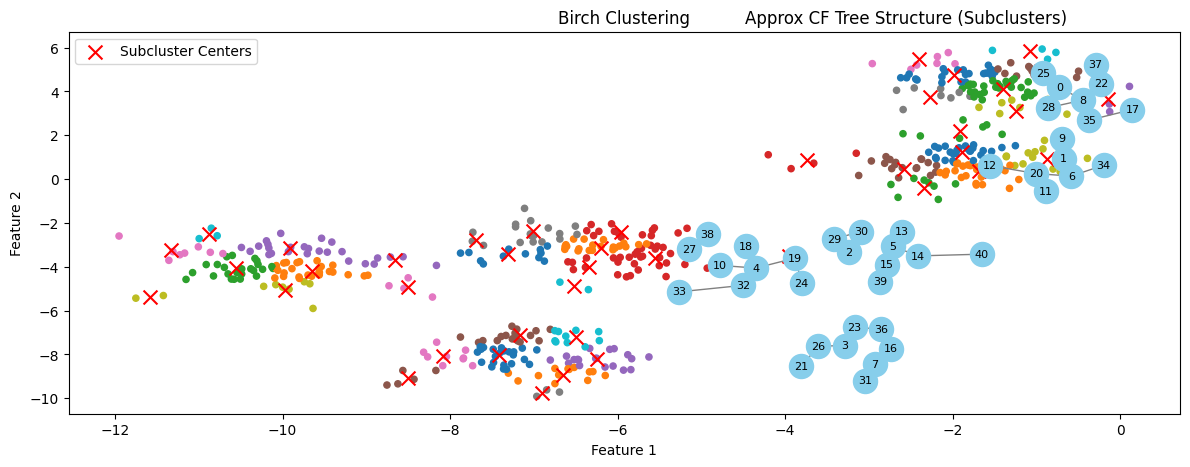

In [4]:
#3. Visualize original clustered data

plt.figure(figsize= (12,5))
plt.scatter(X[:, 0], X[:, 1], c = y_birch, cmap='tab10', s=20)
plt.title("Birch Clustering")
plt.xlabel ("Feature 1")
plt.ylabel ("Feature 2" )

if hasattr(birch_model, 'subcluster_centers_'):
    centers = birch_model.subcluster_centers_
    plt.scatter(centers[:,0], centers[:,1], c='red', marker= 'x', s = 100, label ='Subcluster Centers')
    plt.legend()

plt.subplot (1,2,2)
G = nx.Graph()

for idx, center in enumerate(centers):
    G.add_node (idx, pos = (center[0], center[1]))
    
distance_matrix = cdist(centers, centers)
np.fill_diagonal(distance_matrix, np.inf)

for i in range(len(centers)):
    nearest = np.argmin(distance_matrix[i]) 
    G.add_edge(i, nearest)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels =  True, node_size = 300, node_color = 'skyblue', edge_color = 'gray', font_size = 8)
plt.title("Approx CF Tree Structure (Subclusters)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()